In [18]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
from joblib import dump
import numpy as np
import matplotlib as plt

In [19]:
X_train = pd.read_csv("../../Split Data/Training Dataset/X_train #3.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../Split Data/Training Dataset/y_train #3.csv", index_col=0)
X_test = pd.read_csv("../../Split Data/Testing Dataset/X_test #3.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../Split Data/Testing Dataset/y_test #3.csv", index_col=0)
X_val = pd.read_csv("../../Split Data/Validation Dataset/X_val #3.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../Split Data/Validation Dataset/y_val #3.csv", index_col=0)


In [20]:
model = LinearSVC(C= 0.20)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)   
X_test_scaled = scaler.transform(X_test) 

In [22]:
model.fit(X_train_scaled, y_train.values.ravel())

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.2)

In [23]:
val_accuracy = model.score(X_val_scaled, y_val)
print(val_accuracy)

0.6216616453046009


In [24]:
test_accuracy = model.score(X_test_scaled, y_test)
print(test_accuracy)

0.625304788531015


In [25]:
actual_y = y_test.values.ravel()
pred_y = model.predict(X_test_scaled)

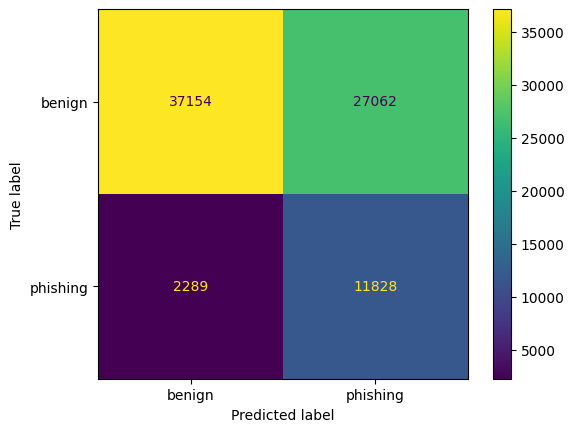

In [26]:
confusion_matrix = metrics.confusion_matrix(actual_y, pred_y)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [27]:
Accuracy = metrics.accuracy_score(actual_y, pred_y)
Precision = metrics.precision_score(actual_y, pred_y)
Recall = metrics.recall_score(actual_y, pred_y)
F1_score = metrics.f1_score(actual_y, pred_y)

In [28]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.625304788531015, 'Precision': 0.3041398817176652, 'Recall': 0.8378550683572997, 'F1_score': 0.4462806799102006}


In [29]:
df = pd.DataFrame({"Model": "LinearSVC", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [30]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.625305,0.30414,0.837855,0.446281


In [31]:
df.to_csv("Metrics of Dataset #3.csv", index=False)

In [32]:
dump(model, 'LinearSVC #3.joblib')

['LinearSVC #3.joblib']